In [1]:
class SVR:
    def __init__(self, C=1.0, epsilon=0.1):
        self.C = C
        self.epsilon = epsilon
        self.w = None
        self.b = None
        self.support_vectors_ = None

    def fit(self, X, y):
        # Number of training examples
        n_samples, n_features = X.shape

        # Compute the kernel matrix (linear kernel)
        K = X @ X.T

        # Define the objective function for the optimization problem
        def objective(params):
            w, b, xi = params[:n_features], params[n_features], params[n_features+1:]
            w = np.reshape(w, (n_features, 1))
            return 0.5 * np.dot(w.T, w) + self.C * np.sum(xi)

        # Define constraints for the optimization problem
        def constraints(params):
            w, b, xi = params[:n_features], params[n_features], params[n_features+1:]
            w = np.reshape(w, (n_features, 1))
            constraints = []
            for i in range(n_samples):
                constraints.append(y[i] - (np.dot(X[i], w) + b) <= self.epsilon + xi[i])
                constraints.append((np.dot(X[i], w) + b) - y[i] <= self.epsilon + xi[i])
                constraints.append(xi[i] >= 0)
            return constraints

        # Initial guess
        initial_params = np.zeros(n_features + 1 + n_samples)

        # Solve the optimization problem
        result = minimize(objective, initial_params, constraints={'type': 'ineq', 'fun': constraints})

        # Extract the solution
        self.w = np.reshape(result.x[:n_features], (n_features, 1))
        self.b = result.x[n_features]
        self.support_vectors_ = result.x[n_features+1:]

    def predict(self, X):
        return X @ self.w + self.b


In [4]:
# Example dataset
X = np.array([[1000], [1500], [2000], [2500], [3000]])
y = np.array([300000, 400000, 500000, 600000, 700000])

# Initialize and train the SVR model
svr = SVR(C=1, epsilon=20000)
svr.fit(X, y)

# Make predictions
predictions = svr.predict(X)
print(predictions)


[499998.4049138  499998.53991362 500000.         500001.46008638
 500001.5950862 ]


In [3]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


In [5]:
# Example dataset
X = np.array([[1000], [1500], [2000], [2500], [3000]])  # House sizes (feature)
y = np.array([300000, 400000, 500000, 600000, 700000])  # House prices (target)


In [6]:
# Initialize the SVR model with a linear kernel
svr = SVR(kernel='linear', C=1, epsilon=20000)

# Train the model
svr.fit(X, y)


SVR(C=1, epsilon=20000, kernel='linear')

In [9]:
# Make predictions on the training data
y_pred = svr.predict(X)
y_pred


array([320000., 410000., 500000., 590000., 680000.])

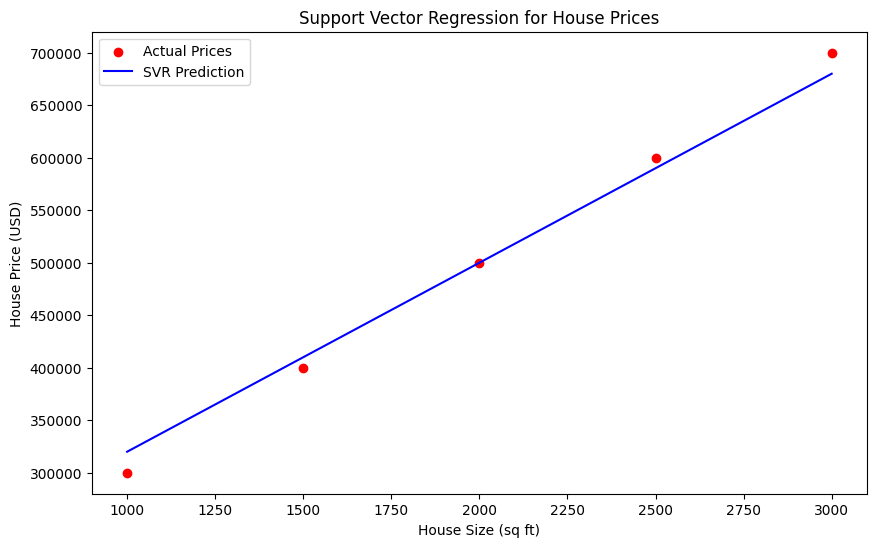

In [8]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual Prices')  # Scatter plot of actual prices
plt.plot(X, y_pred, color='blue', label='SVR Prediction')  # SVR predictions
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (USD)')
plt.title('Support Vector Regression for House Prices')
plt.legend()
plt.show()
